In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 

In [2]:
# Load the dataset
df = pd.read_csv('dataset/yoruba_hate.csv')


In [3]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?
0,Máláàmù,discrimination based on tribe,obo,insulting
1,omo ibo,discrimination based on tribe,akata,insulting
2,omo nna,discrimination based on tribe,òmùgọ̀,insulting
3,èègùn,discrimination based on tribe,Ọ̀dẹ̀,insulting
4,ìrankíran,discrimination based on tribe,Olórí burúkú,insulting


In [4]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?'], dtype='object')

In [5]:
def fill_na_with_mode(df, columns):
   
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Get the mode of the column
            df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode
    return df

In [6]:
# Apply the function to fill NaN values with the mode for specified columns
columns_to_fill = ['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?']
df = fill_na_with_mode(df, columns_to_fill)

print("\nDataFrame after filling NaN values with the mode:")
print(df)


DataFrame after filling NaN values with the mode:
      Hate words                      Why Hate? Offensive words Why offensive?
0    Máláàmù  discrimination based on tribe             obo      insulting
1        omo ibo  discrimination based on tribe           akata      insulting
2        omo nna  discrimination based on tribe          òmùgọ̀      insulting
3          èègùn  discrimination based on tribe           Ọ̀dẹ̀      insulting
4      ìrankíran  discrimination based on tribe    Olórí burúkú      insulting
..           ...                            ...             ...            ...
146  Máláàmù  discrimination based on tribe       ọmọ-ọ̀rọ̀      insulting
147  Máláàmù  discrimination based on tribe         ọmọ-òṣì      insulting
148  Máláàmù  discrimination based on tribe         àkúùsin      insulting
149  Máláàmù  discrimination based on tribe        alákìsáà      insulting
150  Máláàmù  discrimination based on tribe         alákọrí      insulting



In [7]:
# Combine 'Hate word' and 'Why Hate?' columns into one text column for hate speech
df['hate_text'] = df['Hate words']
df['offensive_text'] = df['Offensive words']

# Label the data: 1 for hate speech/offensive speech, 0 for non-hate/non-offensive speech
df['hate_label'] = 1
df['offensive_label'] = 1

In [8]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

In [9]:
# Find the mode of the 'Hate words' column
hate_text_mode = df['hate_text'].mode()[0]
print("\nMost frequently occurring word (mode):", hate_text_mode)

# Fill NaN values with the mode
df['hate_text'].fillna(hate_text_mode, inplace=True)


Most frequently occurring word (mode): Máláàmù


In [10]:
# Lower case all the words of the hate_text before any preprocessing
df['hate_text'] = df['hate_text'].str.lower()

# Removing punctuations present in the text
# punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['hate_text']= df['hate_text'].apply(lambda x: remove_punctuations(x))
# df.head()

In [11]:
# Lower case all the words of the offensive_text before any preprocessing
df['offensive_text'] = df['offensive_text'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['offensive_text']= df['offensive_text'].apply(lambda x: remove_punctuations(x))
# df.head()


In [12]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['Hate words'] = df['Hate words'].apply(lambda text: remove_stopwords(text))
# df.head()

In [13]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
# df.head()


In [14]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

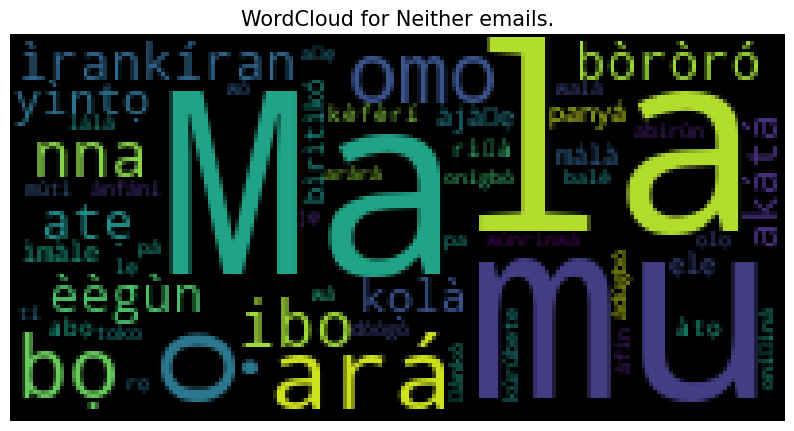

In [15]:
def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['Hate words'])
    
    plt.figure(figsize = (10,10))
    
    # Forming the word cloud
    wc = WordCloud(max_words = 100,
    				width = 200,
    				height = 100,
    				collocations = False).generate(email_corpus)
    
    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['hate_label']==1], typ='Neither')


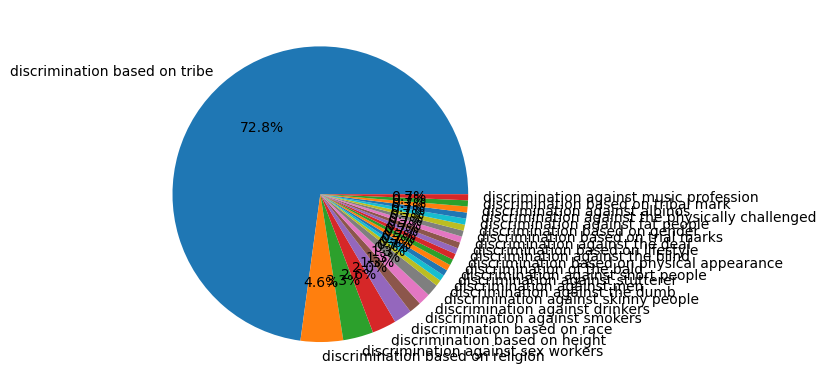

In [16]:
plt.pie(df['Why Hate?'].value_counts().values,
		labels = df['Why Hate?'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [17]:
# Create a list of non-hate and non-offensive speech examples
non_hate_speech = [
    "Ẹ ku ọjọ́ mẹ́ta",
    "Bawo ni ọ̀rọ̀ ṣe jẹ́?",
    "Ẹ ṣeun",
    "Ẹ kúlẹ̀ ọ",
    "Ọjọ́ rere ni yíò jẹ́",
    "Ẹ káàrọ̀",
    "Ẹ káàsán",
    "Ẹ káalẹ",
    "Mo wa daadaa",
    "Ọmọ tuntun ni ó bí",
    "Mo fẹ́ rántí ọ̀rẹ́ mi",
    "Ẹ jẹ́ kí a kẹ́dùn mọ́lẹ́",
    "Ọlọ́run á dáàbò bò wá",
    "Ọmọ òdó ni mo jẹ́",
    "Mo nífẹ̀ẹ́ ẹ",
    "Ẹ kábọ̀ si ìlú wa",
    "Àwọn ọmọ wa ń kẹ́kọ̀ọ́",
    "Ọjọ́ ọ̀la ni yóò dára",
    "Mo gbagbọ́ nínú ìre",
    "Mo dúpẹ́ lọ́wọ́ Ọlọ́run"
]


In [18]:
# Create a DataFrame for non-hate and non-offensive speech examples
non_hate_df = pd.DataFrame({'hate_text': non_hate_speech, 'hate_label': 0, 'offensive_text': non_hate_speech, 'offensive_label': 0})

# Combine the datasets
combined_df = pd.concat([df[['hate_text', 'hate_label', 'offensive_text', 'offensive_label']], non_hate_df])


In [19]:
import os

In [20]:
# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Split into features and labels for hate speech
X_hate = combined_df['hate_text']
y_hate = combined_df['hate_label']

# Split into features and labels for offensive speech
X_offensive = combined_df['offensive_text']
y_offensive = combined_df['offensive_label']

# Split the data into training and testing sets
X_hate_train, X_hate_test, y_hate_train, y_hate_test = train_test_split(X_hate, y_hate, test_size=0.3, random_state=42)
X_offensive_train, X_offensive_test, y_offensive_train, y_offensive_test = train_test_split(X_offensive, y_offensive, test_size=0.3, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
X_hate_train_tfidf = tfidf_vectorizer.fit_transform(X_hate_train)
X_hate_test_tfidf = tfidf_vectorizer.transform(X_hate_test)
X_offensive_train_tfidf = tfidf_vectorizer.fit_transform(X_offensive_train)
X_offensive_test_tfidf = tfidf_vectorizer.transform(X_offensive_test)

# Define the models to be tested
models = {
    'yoruba_LogisticRegression': LogisticRegression(),
    'yoruba_DecisionTree': DecisionTreeClassifier(),
    'yoruba_RandomForest': RandomForestClassifier(),
    'yoruba_SVM': SVC(),
    'yoruba_KNN': KNeighborsClassifier(),
    'yoruba_NaiveBayes': MultinomialNB()
}



In [21]:
# Dictionary to store the accuracy of each model
model_accuracy = {}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test, task_name):
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        # Store the accuracy
        model_accuracy[f"{task_name} - {model_name}"] = accuracy
        # Save the model
        with open(f'models/{task_name}_{model_name}.pkl', 'wb') as f:
            pickle.dump(model, f)


In [22]:

# Train and evaluate models for hate speech detection
train_and_evaluate(models, X_hate_train_tfidf, y_hate_train, X_hate_test_tfidf, y_hate_test, 'yoruba_hate_speech')

# Train and evaluate models for offensive speech detection
train_and_evaluate(models, X_offensive_train_tfidf, y_offensive_train, X_offensive_test_tfidf, y_offensive_test, 'yoruba_offensive_speech')



In [23]:
# Save the models
def save_models(models, task_name):
    for model_name, model in models.items():
        model_file_path = f'models/{task_name}_{model_name}.pkl'
        with open(model_file_path, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model saved: {model_file_path}")

# Save the hate speech detection models
save_models(models, 'yoruba_hate_speech')

# Save the offensive speech detection models
save_models(models, 'yoruba_offensive_speech')

Model saved: models/yoruba_hate_speech_yoruba_LogisticRegression.pkl
Model saved: models/yoruba_hate_speech_yoruba_DecisionTree.pkl
Model saved: models/yoruba_hate_speech_yoruba_RandomForest.pkl
Model saved: models/yoruba_hate_speech_yoruba_SVM.pkl
Model saved: models/yoruba_hate_speech_yoruba_KNN.pkl
Model saved: models/yoruba_hate_speech_yoruba_NaiveBayes.pkl
Model saved: models/yoruba_offensive_speech_yoruba_LogisticRegression.pkl
Model saved: models/yoruba_offensive_speech_yoruba_DecisionTree.pkl
Model saved: models/yoruba_offensive_speech_yoruba_RandomForest.pkl
Model saved: models/yoruba_offensive_speech_yoruba_SVM.pkl
Model saved: models/yoruba_offensive_speech_yoruba_KNN.pkl
Model saved: models/yoruba_offensive_speech_yoruba_NaiveBayes.pkl


In [24]:
# Print the accuracy of each model
for model_name, accuracy in model_accuracy.items():
    print(f"{model_name}: {accuracy:.4f}")

# Save the TfidfVectorizer
with open('models/yoruba_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

yoruba_hate_speech - yoruba_LogisticRegression: 0.9038
yoruba_hate_speech - yoruba_DecisionTree: 0.9423
yoruba_hate_speech - yoruba_RandomForest: 0.9423
yoruba_hate_speech - yoruba_SVM: 0.9038
yoruba_hate_speech - yoruba_KNN: 0.9615
yoruba_hate_speech - yoruba_NaiveBayes: 0.9231
yoruba_offensive_speech - yoruba_LogisticRegression: 0.9038
yoruba_offensive_speech - yoruba_DecisionTree: 0.9231
yoruba_offensive_speech - yoruba_RandomForest: 0.9423
yoruba_offensive_speech - yoruba_SVM: 0.9038
yoruba_offensive_speech - yoruba_KNN: 0.9231
yoruba_offensive_speech - yoruba_NaiveBayes: 0.9038


In [25]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?,hate_text,offensive_text,hate_label,offensive_label
0,Máláàmù,discrimination based on tribe,obo,insulting,máláàmù,obo,1,1
1,omo ibo,discrimination based on tribe,akata,insulting,omo ibo,akata,1,1
2,omo nna,discrimination based on tribe,òmùgọ̀,insulting,omo nna,òmùgọ̀,1,1
3,èègùn,discrimination based on tribe,Ọ̀dẹ̀,insulting,èègùn,ọ̀dẹ̀,1,1
4,ìrankíran,discrimination based on tribe,Olórí burúkú,insulting,ìrankíran,olórí burúkú,1,1
